In [ ]:
#!cp -r /content/drive/MyDrive/ICU_Dataset/ICUDatasetProcessed .

In [1]:
#!pip install numpy
#!pip install pandas
#!pip instal os
#!pip install scikit-learn

import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("ICUDatasetProcessed/environmentMonitoring.csv")
df1.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [3]:
df1

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.151,10.5.126.84,40629,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
1,0.000053,0.000053,72,10.5.126.84,10.5.126.151,1883,40629,0x00000018,0.000053,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
2,0.000043,0.000096,105,10.5.126.153,10.5.126.84,45639,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
3,0.000020,0.000116,72,10.5.126.84,10.5.126.153,1883,45639,0x00000018,0.000020,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
4,0.000016,0.000132,105,10.5.126.155,10.5.126.84,45093,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31753,0.000008,2047.246123,80,10.5.150.152,10.5.150.109,37239,1883,0x00000018,2.998972,12,...,0.0,0.0,CoGas,5.0,0.0,0.0,6,64,environmentMonitoring,0
31754,0.000058,2047.246181,72,10.5.150.109,10.5.150.156,1883,44939,0x00000018,0.000083,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
31755,0.000011,2047.246192,72,10.5.150.109,10.5.150.157,1883,44853,0x00000018,0.000119,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
31756,0.000010,2047.246202,72,10.5.150.109,10.5.150.156,1883,37361,0x00000018,0.000109,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0


In [4]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['AdaBoost_model.pkl',
 'Attack.csv',
 'Attack.zip',
 'DecisionTree_model.pkl',
 'ensemble_model.pkl',
 'ensemble_model.zip',
 'environmentMonitoring.csv',
 'GaussianNB_model.pkl',
 'KNN_model.pkl',
 'LogisticRegression_model.pkl',
 'patientMonitoring.csv',
 'RandomForest_model.pkl']

In [5]:
import os
import pandas as pd

path = 'ICUDatasetProcessed/'
csvs = [file for file in os.listdir(path) if file.endswith('.csv')]

dfs = []

for csv in csvs:
    print(f'---- Reading {csv} ----')
    try:
        # reading the CSV
        df = pd.read_csv(os.path.join(path, csv))
        print(f'df.shape: {df.shape}')
        
        empty_cols = [col for col in df.columns if df[col].isnull().all()]
        print(f'empty_cols: {len(empty_cols)}')
        print(empty_cols)
        
        df.fillna(0, inplace=True)
        
        # Add the dataframe to the list
        dfs.append(df)
        print(f"Current dfs length: {len(dfs)}")
    except Exception as e:
        print(f"Error {csv}: {e}")

if dfs:
    common_columns = set.intersection(*(set(df.columns) for df in dfs))
    print(f"comon column for merge: {common_columns}")

    for col in common_columns:
        col_types = {df[col].dtype for df in dfs if col in df.columns}
        if len(col_types) > 1:
            print(f"Adjusting column '{col}' with different types: {col_types}")
            for df in dfs:
                if col in df.columns:
                    # Força todas as colunas para o tipo string como padrão
                    df[col] = df[col].astype(str)

    # Realizar o merge
    try:
        merged_df = dfs[0]
        for df in dfs[1:]:
            merged_df = pd.merge(merged_df, df, on=list(common_columns), how='outer')
        print(f"Final merged_df shape: {merged_df.shape}")
    except ValueError as e:
        print(f"Erro no merge: {e}. Realizando concatenação como fallback.")
        merged_df = pd.concat(dfs, ignore_index=True)

else:
    print("none of file was reading.")



---- Reading Attack.csv ----


C:\Users\ZINGA\AppData\Local\Temp\ipykernel_11836\3302865851.py:13: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


df.shape: (80126, 52)
empty_cols: 0
[]
Current dfs length: 1
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
Current dfs length: 2
---- Reading patientMonitoring.csv ----


C:\Users\ZINGA\AppData\Local\Temp\ipykernel_11836\3302865851.py:13: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


df.shape: (76810, 52)
empty_cols: 0
[]
Current dfs length: 3
comon column for merge: {'mqtt.conack.val', 'mqtt.conflags', 'frame.time_delta', 'mqtt.conflag.retain', 'frame.time_relative', 'tcp.checksum', 'mqtt.ver', 'tcp.flags.fin', 'tcp.connection.fin', 'tcp.hdr_len', 'tcp.flags.reset', 'tcp.payload', 'mqtt.hdrflags', 'frame.len', 'mqtt.conflag.reserved', 'mqtt.len', 'tcp.ack', 'mqtt.msg', 'mqtt.conflag.passwd', 'mqtt.retain', 'mqtt.qos', 'tcp.srcport', 'mqtt.topic_len', 'ip.ttl', 'tcp.time_delta', 'mqtt.topic', 'ip.src', 'tcp.len', 'ip.dst', 'tcp.connection.sack', 'tcp.flags.syn', 'tcp.connection.syn', 'tcp.flags.urg', 'mqtt.conack.flags', 'class', 'mqtt.clientid_len', 'tcp.pdu.size', 'label', 'tcp.flags', 'tcp.connection.rst', 'tcp.flags.ack', 'mqtt.clientid', 'ip.proto', 'tcp.dstport', 'tcp.window_size_value', 'mqtt.conflag.qos', 'mqtt.conflag.willflag', 'mqtt.kalive', 'mqtt.willmsg_len', 'mqtt.dupflag', 'mqtt.msgtype', 'tcp.flags.push'}
Adjusting column 'mqtt.len' with different t

In [6]:
df1

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.151,10.5.126.84,40629,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
1,0.000053,0.000053,72,10.5.126.84,10.5.126.151,1883,40629,0x00000018,0.000053,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
2,0.000043,0.000096,105,10.5.126.153,10.5.126.84,45639,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
3,0.000020,0.000116,72,10.5.126.84,10.5.126.153,1883,45639,0x00000018,0.000020,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
4,0.000016,0.000132,105,10.5.126.155,10.5.126.84,45093,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31753,0.000008,2047.246123,80,10.5.150.152,10.5.150.109,37239,1883,0x00000018,2.998972,12,...,0.0,0.0,CoGas,5.0,0.0,0.0,6,64,environmentMonitoring,0
31754,0.000058,2047.246181,72,10.5.150.109,10.5.150.156,1883,44939,0x00000018,0.000083,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
31755,0.000011,2047.246192,72,10.5.150.109,10.5.150.157,1883,44853,0x00000018,0.000119,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
31756,0.000010,2047.246202,72,10.5.150.109,10.5.150.156,1883,37361,0x00000018,0.000109,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0


In [10]:
import os
import pandas as pd

# path for the files 
path = 'ICUDatasetProcessed/'
csvs = [file for file in os.listdir(path) if file.endswith('.csv')]

#  DataFrames's list for storage
dfs = []
for csv in csvs:
    df = pd.read_csv(os.path.join(path, csv))
    dfs.append(df)

def find_inconsistent_columns(dfs):
    inconsistent_columns = {}
    for col in dfs[0].columns:  
        types = {df[col].dtype for df in dfs if col in df.columns}
        if len(types) > 1:
            inconsistent_columns[col] = list(types)
    return inconsistent_columns

# identify and correct
inconsistent_columns = find_inconsistent_columns(dfs)

if inconsistent_columns:
    print("Column with inconsistents types:")
    for col, types in inconsistent_columns.items():
        print(f"Colunm: {col}, finded types: {types}")
        
        
        for df in dfs:
            if col in df.columns:
                df[col] = df[col].astype(str)

    # reating merged_df after corrections 
    merged_df = pd.concat(dfs, ignore_index=True)
    print(f"After corrections, merged_df shape: {merged_df.shape}")
else:
    print("No columns with inconsistent types were found.")


C:\Users\ZINGA\AppData\Local\Temp\ipykernel_11836\602686355.py:11: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))
C:\Users\ZINGA\AppData\Local\Temp\ipykernel_11836\602686355.py:11: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


Column with inconsistents types:
Colunm: tcp.pdu.size, finded types: [dtype('float64'), dtype('int64')]
Colunm: mqtt.len, finded types: [dtype('float64'), dtype('int64')]
Colunm: mqtt.msg, finded types: [dtype('float64'), dtype('O')]
Colunm: mqtt.msgtype, finded types: [dtype('float64'), dtype('int64')]
After corrections, merged_df shape: (188694, 52)


In [11]:
total_rows = sum(len(df) for df in dfs)
print(f"Total rows in input DataFrames: {total_rows}")
print(f"Rows in merged_df: {len(merged_df)}")


Total rows in input DataFrames: 188694
Rows in merged_df: 188694


In [13]:
for col in merged_df.select_dtypes(include='number').columns:
    print(f"{col} - Mean (merged): {merged_df[col].mean()}, Std (merged): {merged_df[col].std()}")
    for df in dfs:
        if col in df.columns:
            print(f"{col} - Mean (source): {df[col].mean()}, Std (source): {df[col].std()}")


frame.time_delta - Mean (merged): 0.07784608345787739, Std (merged): 0.4007755241267379
frame.time_delta - Mean (source): 0.005482580660459402, Std (source): 0.21691897789986617
frame.time_delta - Mean (source): 0.12532489703382346, Std (source): 0.5389979832019886
frame.time_delta - Mean (source): 0.1337029492774276, Std (source): 0.4646222352208427
frame.time_relative - Mean (merged): 1374.2475078541613, Std (merged): 1806.6347334060965
frame.time_relative - Mean (source): 45.000738114344784, Std (source): 67.82898800653882
frame.time_relative - Mean (source): 985.3084244355099, Std (source): 571.9079036945309
frame.time_relative - Mean (source): 2921.691253243833, Std (source): 1891.5460985008262
frame.len - Mean (merged): 164.8569429870584, Std (merged): 329.23818569340455
frame.len - Mean (source): 281.17212889698726, Std (source): 481.186648922515
frame.len - Mean (source): 78.29951508281378, Std (source): 5.168694392539927
frame.len - Mean (source): 79.30844942064836, Std (sourc

In [15]:
print(merged_df.dtypes)


frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                    object
ip.dst                    object
tcp.srcport                int64
tcp.dstport                int64
tcp.flags                 object
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.payload               object
tcp.pdu.size              object
tcp.window_size_value      int64
tcp.checksum              object
mqtt.clientid             object
mqtt.clientid_len        float64
mqtt.conack.flags         object
mqtt.conack.val          float64
mqtt.confl

In [16]:
valid_values = [0, 1]
invalid_rows = merged_df[~merged_df['label'].isin(valid_values)]
print(f"Invalid rows in 'label':\n{invalid_rows}")


Invalid rows in 'label':
Empty DataFrame
Columns: [frame.time_delta, frame.time_relative, frame.len, ip.src, ip.dst, tcp.srcport, tcp.dstport, tcp.flags, tcp.time_delta, tcp.len, tcp.ack, tcp.connection.fin, tcp.connection.rst, tcp.connection.sack, tcp.connection.syn, tcp.flags.ack, tcp.flags.fin, tcp.flags.push, tcp.flags.reset, tcp.flags.syn, tcp.flags.urg, tcp.hdr_len, tcp.payload, tcp.pdu.size, tcp.window_size_value, tcp.checksum, mqtt.clientid, mqtt.clientid_len, mqtt.conack.flags, mqtt.conack.val, mqtt.conflag.passwd, mqtt.conflag.qos, mqtt.conflag.reserved, mqtt.conflag.retain, mqtt.conflag.willflag, mqtt.conflags, mqtt.dupflag, mqtt.hdrflags, mqtt.kalive, mqtt.len, mqtt.msg, mqtt.msgtype, mqtt.qos, mqtt.retain, mqtt.topic, mqtt.topic_len, mqtt.ver, mqtt.willmsg_len, ip.proto, ip.ttl, class, label]
Index: []

[0 rows x 52 columns]


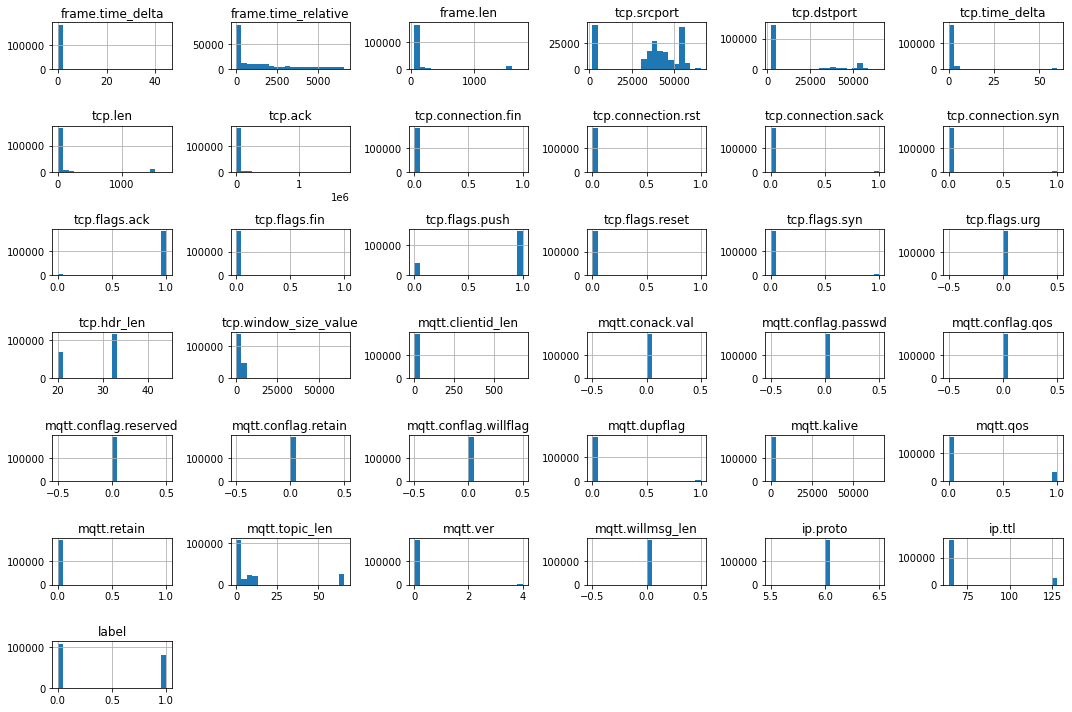

In [17]:
#!pip install matplotlib
import matplotlib.pyplot as plt

merged_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


In [22]:
object_columns = merged_df.select_dtypes(include=['object']).columns
print(f"Object columns: {list(object_columns)}")

Object columns: ['ip.src', 'ip.dst', 'tcp.flags', 'tcp.payload', 'tcp.pdu.size', 'tcp.checksum', 'mqtt.clientid', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.topic', 'class']


In [23]:
for col in object_columns:
    print(f"Column '{col}':")
    print(merged_df[col].value_counts())
    print("\n")


Column 'ip.src':
ip.src
192.168.1.90    46210
192.168.1.91    24714
10.5.126.145    10596
10.5.126.147    10596
10.5.126.148    10518
10.5.126.146    10518
10.5.126.165     6858
10.5.126.167     6858
10.5.126.168     6782
10.5.126.166     6780
10.5.126.84      6084
10.16.120.44     5114
10.5.126.56      4544
10.16.120.72     4088
10.5.150.109     3222
10.5.150.157     1436
10.5.150.156     1436
10.5.150.152     1436
10.5.126.136     1356
10.5.126.132     1356
10.5.126.157     1356
10.5.126.152     1356
10.5.126.137     1356
10.5.126.156     1356
10.5.126.134      840
10.5.126.151      840
10.5.126.153      840
10.5.126.155      840
10.5.126.133      840
10.5.126.154      840
10.5.126.135      840
10.5.126.131      840
10.5.150.151      822
10.5.150.154      822
10.5.150.153      822
10.5.150.155      822
10.5.126.141      416
10.5.126.144      416
10.5.126.143      416
10.5.126.142      416
10.5.126.161      274
10.5.126.163      274
10.5.126.162      274
10.5.126.164      274
Name: co

In [24]:
merged_df['ip.src'] = merged_df['ip.src'].astype('category').cat.codes
merged_df['ip.dst'] = merged_df['ip.dst'].astype('category').cat.codes
merged_df['tcp.flags'] = merged_df['tcp.flags'].astype('category').cat.codes
merged_df.drop(columns=['tcp.payload'], inplace=True)
merged_df['mqtt.clientid'] = merged_df['mqtt.clientid'].astype('category').cat.codes
merged_df['mqtt.topic'] = merged_df['mqtt.topic'].astype('category').cat.codes
merged_df['mqtt.msgtype'] = merged_df['mqtt.msgtype'].astype('category').cat.codes
merged_df['mqtt.conflags'] = merged_df['mqtt.conflags'].astype('category').cat.codes
merged_df['class'] = merged_df['class'].astype('category').cat.codes


In [25]:
print(merged_df.dtypes)


frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                      int8
ip.dst                      int8
tcp.srcport                int64
tcp.dstport                int64
tcp.flags                   int8
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.pdu.size              object
tcp.window_size_value      int64
tcp.checksum              object
mqtt.clientid              int16
mqtt.clientid_len        float64
mqtt.conack.flags         object
mqtt.conack.val          float64
mqtt.conflag.passwd      float64
mqtt.confl

In [26]:
object_columns = merged_df.select_dtypes(include=['object']).columns
print(f"Colunas com tipo 'object': {list(object_columns)}")

Colunas com tipo 'object': ['tcp.pdu.size', 'tcp.checksum', 'mqtt.conack.flags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg']


In [27]:
# Conversão para numérico, com fallback para NaN
merged_df['tcp.pdu.size'] = pd.to_numeric(merged_df['tcp.pdu.size'], errors='coerce')
merged_df['mqtt.len'] = pd.to_numeric(merged_df['mqtt.len'], errors='coerce')

# Conversão para categorias (codificação como números inteiros)
merged_df['tcp.checksum'] = merged_df['tcp.checksum'].astype('category').cat.codes
merged_df['mqtt.msg'] = merged_df['mqtt.msg'].astype('category').cat.codes
merged_df['mqtt.conack.flags'] = merged_df['mqtt.conack.flags'].astype('category').cat.codes
merged_df['mqtt.hdrflags'] = merged_df['mqtt.hdrflags'].astype('category').cat.codes

In [28]:
merged_df.drop(columns=['tcp.checksum', 'mqtt.msg'], inplace=True)


In [29]:
print(merged_df.dtypes)


frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                      int8
ip.dst                      int8
tcp.srcport                int64
tcp.dstport                int64
tcp.flags                   int8
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.pdu.size             float64
tcp.window_size_value      int64
mqtt.clientid              int16
mqtt.clientid_len        float64
mqtt.conack.flags           int8
mqtt.conack.val          float64
mqtt.conflag.passwd      float64
mqtt.conflag.qos         float64
mqtt.confl

In [30]:
for col in merged_df.columns:
    unique_values = merged_df[col].nunique()
    print(f"Column '{col}': {unique_values} single values")

Coluna 'frame.time_delta': 11904 valores únicos
Coluna 'frame.time_relative': 176587 valores únicos
Coluna 'frame.len': 633 valores únicos
Coluna 'ip.src': 44 valores únicos
Coluna 'ip.dst': 44 valores únicos
Coluna 'tcp.srcport': 2062 valores únicos
Coluna 'tcp.dstport': 2062 valores únicos
Coluna 'tcp.flags': 8 valores únicos
Coluna 'tcp.time_delta': 49228 valores únicos
Coluna 'tcp.len': 638 valores únicos
Coluna 'tcp.ack': 26555 valores únicos
Coluna 'tcp.connection.fin': 2 valores únicos
Coluna 'tcp.connection.rst': 2 valores únicos
Coluna 'tcp.connection.sack': 2 valores únicos
Coluna 'tcp.connection.syn': 2 valores únicos
Coluna 'tcp.flags.ack': 2 valores únicos
Coluna 'tcp.flags.fin': 2 valores únicos
Coluna 'tcp.flags.push': 2 valores únicos
Coluna 'tcp.flags.reset': 2 valores únicos
Coluna 'tcp.flags.syn': 2 valores únicos
Coluna 'tcp.flags.urg': 1 valores únicos
Coluna 'tcp.hdr_len': 4 valores únicos
Coluna 'tcp.pdu.size': 84 valores únicos
Coluna 'tcp.window_size_value': 57

In [18]:
correlations = merged_df.corr()['label'].sort_values(ascending=False)
print("Correlation with the variable 'label':\n", correlations)

Correlation with the variable 'label':
 label                    1.000000
ip.ttl                   0.451898
mqtt.topic_len           0.352042
tcp.dstport              0.346884
tcp.ack                  0.338438
tcp.len                  0.318514
mqtt.qos                 0.308138
frame.len                0.303503
tcp.window_size_value    0.301142
mqtt.dupflag             0.205104
tcp.flags.syn            0.168705
tcp.connection.syn       0.118671
tcp.connection.sack      0.118671
tcp.flags.fin            0.109362
tcp.connection.fin       0.109362
tcp.flags.reset          0.108759
tcp.connection.rst       0.108759
mqtt.ver                 0.106796
mqtt.kalive              0.085703
mqtt.retain              0.029364
mqtt.clientid_len        0.027462
tcp.srcport              0.015110
frame.time_delta        -0.155116
tcp.flags.ack           -0.160791
tcp.time_delta          -0.245814
tcp.flags.push          -0.601284
frame.time_relative     -0.632080
tcp.hdr_len             -0.823547
tcp.flag

In [19]:
low_corr_cols = correlations[abs(correlations) < 0.1].index
print(f"Columns with low correlation:\n {list(low_corr_cols)}")
merged_df.drop(columns=low_corr_cols, inplace=True)

Columns with low correlation:
 ['mqtt.kalive', 'mqtt.retain', 'mqtt.clientid_len', 'tcp.srcport']


In [20]:
nan_corr_cols = correlations[correlations.isna()].index
print(f"Columns with NaN in correlation\n {list(nan_corr_cols)}")
merged_df.drop(columns=nan_corr_cols, inplace=True)

Columns with NaN in correlation
 ['tcp.flags.urg', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.willmsg_len', 'ip.proto']


In [21]:
print("DataFrame size after cleaning:", merged_df.shape)
print("Data types after cleaning:\n", merged_df.dtypes)


DataFrame size after cleaning: (188694, 39)
Data types after cleaning:
 frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                    object
ip.dst                    object
tcp.dstport                int64
tcp.flags                 object
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.hdr_len                int64
tcp.payload               object
tcp.pdu.size              object
tcp.window_size_value      int64
tcp.checksum              object
mqtt.clientid             object
mqtt.conack.flags         object
mqtt.conflags             object
mqtt.dupflag             float64
mqtt

In [22]:
print("Remaining missing values ​​per column:\n", merged_df.isnull().sum())

Remaining missing values ​​per column:
 frame.time_delta         0
frame.time_relative      0
frame.len                0
ip.src                   0
ip.dst                   0
tcp.dstport              0
tcp.flags                0
tcp.time_delta           0
tcp.len                  0
tcp.ack                  0
tcp.connection.fin       0
tcp.connection.rst       0
tcp.connection.sack      0
tcp.connection.syn       0
tcp.flags.ack            0
tcp.flags.fin            0
tcp.flags.push           0
tcp.flags.reset          0
tcp.flags.syn            0
tcp.hdr_len              0
tcp.payload              0
tcp.pdu.size             0
tcp.window_size_value    0
tcp.checksum             0
mqtt.clientid            0
mqtt.conack.flags        0
mqtt.conflags            0
mqtt.dupflag             0
mqtt.hdrflags            0
mqtt.len                 0
mqtt.msg                 0
mqtt.msgtype             0
mqtt.qos                 0
mqtt.topic               0
mqtt.topic_len           0
mqtt.ver       

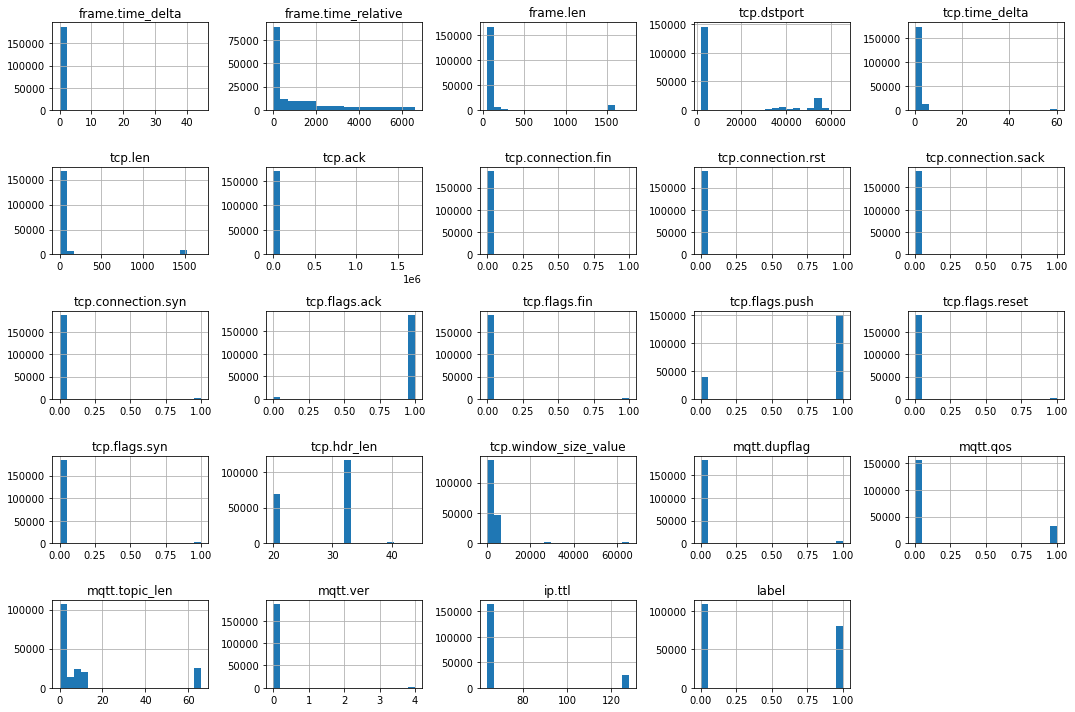

In [23]:
import matplotlib.pyplot as plt

merged_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [26]:
# Set features to all columns except target variable 'label'
features = merged_df.drop(columns=['label'], axis=1)
# Check dimensions
print("Feature dimension:", features.shape)
print("dimension of merged_df:", merged_df.shape)


Feature dimension: (188694, 38)
dimension of merged_df: (188694, 39)


In [ ]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

features = merged_df.drop(columns=['label'])  #Remove target column
normalized_features = scaler.fit_transform(features)  # Normalize the data 

# Reconstructs the normalized DataFrame
df1_normalized = pd.DataFrame(normalized_features, columns=features.columns, index=merged_df.index)

# Adds 'label' column to normalized DataFrame
df1_normalized['label'] = merged_df['label'].values

print(df1_normalized.head())

In [41]:
print("Dimensão do DataFrame normalizado:", df1_normalized.shape)
print("Dimensão do DataFrame original:", merged_df.shape)


Dimensão do DataFrame normalizado: (188694, 35)
Dimensão do DataFrame original: (188694, 35)


In [43]:
from sklearn.model_selection import train_test_split

# Verifica a consistência dos tamanhos
print(f"Dimensão de df1_normalized: {df1_normalized.shape}")
print(f"Dimensão de df1_normalized['label']: {df1_normalized['label'].shape}")

# Divide os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df1_normalized.drop(labels=['label'], axis=1),  # Todas as colunas exceto 'label'
    df1_normalized['label'],                       # A variável-alvo
    test_size=0.3,
    random_state=100
)

# Verifica as dimensões após a divisão
print(f"Dimensão de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensão de X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensão de df1_normalized: (188694, 35)
Dimensão de df1_normalized['label']: (188694,)
Dimensão de X_train: (132085, 34), y_train: (132085,)
Dimensão de X_test: (56609, 34), y_test: (56609,)


In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [False False False  True  True False False False False False False False
 False  True  True False  True False False False False False  True False
 False False False  True False False  True False  True  True]
10 selected features
embeded_LR_features:  ['ip.src', 'ip.dst', 'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.push', 'mqtt.conack.flags', 'mqtt.msgtype', 'mqtt.topic_len', 'ip.ttl', 'class']


In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [54]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------


/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ensemble_model = VotingClassifier(
    estimators=[
        ('gnb', gnb),  # Gaussian Naive Bayes
        ('knn', KNN_model),  # K-Nearest Neighbors
        ('rf', RF),  # Random Forest
        ('ab', AB),  # AdaBoost
        ('logr', LogR),  # Logistic Regression
        ('dt', DT)  # Decision Tree
    ],
    voting='hard'  # 'hard' para votação majoritária; 'soft' se os modelos suportarem probabilidades
)

ensemble_model.fit(X_train, y_train)

ensemble_predictions = ensemble_model.predict(X_test)

print("Desempenho do Ensemble:")
print(f"Acurácia: {accuracy_score(y_test, ensemble_predictions)}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, ensemble_predictions))
print("\nRelatório de Classificação:")
print(classification_report(y_test, ensemble_predictions))


/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Desempenho do Ensemble:
Acurácia: 1.0

Matriz de Confusão:
[[32620     0]
 [    0 23989]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32620
           1       1.00      1.00      1.00     23989

    accuracy                           1.00     56609
   macro avg       1.00      1.00      1.00     56609
weighted avg       1.00      1.00      1.00     56609



In [44]:
X_test.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,...,mqtt.dupflag,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl,class
109898,1.350247e-07,0.253401,0.016939,0.860465,0.790698,0.0,0.857143,8.324141e-02,0.008834,0.000034,...,0.0,0.230769,0.018786,0.571429,0.0,0.002517,0.121212,0.0,0.0,0.5
135455,2.813015e-06,0.112392,0.014019,0.651163,0.744186,0.0,0.857143,3.331109e-02,0.005889,0.000017,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
146863,6.593706e-06,0.301470,0.014019,0.651163,0.744186,0.0,0.857143,3.332720e-02,0.005889,0.000041,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
12834,2.250412e-08,0.000737,0.067757,0.976744,1.000000,0.0,0.857143,1.665630e-08,0.068316,0.001093,...,0.0,0.384615,0.252890,0.642857,1.0,0.279150,0.984848,0.0,0.0,0.0
98063,3.825700e-07,0.250614,0.015187,0.418605,0.767442,0.0,0.857143,4.991386e-02,0.007067,0.000034,...,0.0,0.230769,0.014451,0.571429,0.0,0.002304,0.075758,0.0,0.0,0.5


In [45]:
X_test.shape

(56609, 34)

In [46]:
X_test.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,...,mqtt.dupflag,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl,class
109898,1.350247e-07,0.253401,0.016939,0.860465,0.790698,0.0,0.857143,8.324141e-02,0.008834,0.000034,...,0.0,0.230769,0.018786,0.571429,0.0,0.002517,0.121212,0.0,0.0,0.5
135455,2.813015e-06,0.112392,0.014019,0.651163,0.744186,0.0,0.857143,3.331109e-02,0.005889,0.000017,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
146863,6.593706e-06,0.301470,0.014019,0.651163,0.744186,0.0,0.857143,3.332720e-02,0.005889,0.000041,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
12834,2.250412e-08,0.000737,0.067757,0.976744,1.000000,0.0,0.857143,1.665630e-08,0.068316,0.001093,...,0.0,0.384615,0.252890,0.642857,1.0,0.279150,0.984848,0.0,0.0,0.0
98063,3.825700e-07,0.250614,0.015187,0.418605,0.767442,0.0,0.857143,4.991386e-02,0.007067,0.000034,...,0.0,0.230769,0.014451,0.571429,0.0,0.002304,0.075758,0.0,0.0,0.5


In [47]:
print(X_test.columns.tolist())

['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src', 'ip.dst', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.hdr_len', 'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'ip.ttl', 'class']


In [74]:
#!pip install confluent-kafka

In [ ]:
#!pip install confluent-kafka
# Instalar dependência do Kafka (se necessário)
# !pip install confluent-kafka

from confluent_kafka import Producer
import pandas as pd
import joblib
import time
import json

producer_conf = {
    'bootstrap.servers': 'kafka:9092'
}
producer = Producer(producer_conf)

def delivery_report(err, msg):
    if err is not None:
        print(f"Erro ao enviar mensagem: {err}")
    else:
        print(f"Mensagem enviada com sucesso para {msg.topic()} [{msg.partition()}]")

ensemble_model = joblib.load('ensemble_model.pkl')
print("Modelo ensemble carregado com sucesso.")

X_data = X_test.copy() 


for index, row in X_data.iterrows():
    X_row = pd.DataFrame([row], columns=X_data.columns)

    expected_features = ensemble_model.feature_names_in_

    for col in expected_features:
        if col not in X_row.columns:
            X_row[col] = 0  # Ou outro valor padrão adequado

    X_row = X_row[expected_features]

    prediction = ensemble_model.predict(X_row)[0]
    label_type = 0 if prediction == 0 else 1

    # Criar o payload
    payload = {
        "frame.time_delta": row.get("frame.time_delta", None),
        "frame.time_relative": row.get("frame.time_relative", None),
        "frame.len": row.get("frame.len", None),
        "ip.src": row.get("ip.src", None),
        "ip.dst": row.get("ip.dst", None),
        "tcp.dstport": row.get("tcp.dstport", None),
        "tcp.flags": row.get("tcp.flags", None),
        "tcp.time_delta": row.get("tcp.time_delta", None),
        "tcp.len": row.get("tcp.len", None),
        "tcp.ack": row.get("tcp.ack", None),
        "tcp.connection.fin": row.get("tcp.connection.fin", None),
        "tcp.connection.rst": row.get("tcp.connection.rst", None),
        "tcp.connection.sack": row.get("tcp.connection.sack", None),
        "tcp.connection.syn": row.get("tcp.connection.syn", None),
        "tcp.flags.ack": row.get("tcp.flags.ack", None),
        "tcp.flags.fin": row.get("tcp.flags.fin", None),
        "tcp.flags.push": row.get("tcp.flags.push", None),
        "tcp.flags.reset": row.get("tcp.flags.reset", None),
        "tcp.flags.syn": row.get("tcp.flags.syn", None),
        "tcp.hdr_len": row.get("tcp.hdr_len", None),
        "tcp.pdu.size": row.get("tcp.pdu.size", None),
        "tcp.window_size_value": row.get("tcp.window_size_value", None),
        "mqtt.conack.flags": row.get("mqtt.conack.flags", None),
        "mqtt.conflags": row.get("mqtt.conflags", None),
        "mqtt.dupflag": row.get("mqtt.dupflag", None),
        "mqtt.hdrflags": row.get("mqtt.hdrflags", None),
        "mqtt.len": row.get("mqtt.len", None),
        "mqtt.msgtype": row.get("mqtt.msgtype", None),
        "mqtt.qos": row.get("mqtt.qos", None),
        "mqtt.topic": row.get("mqtt.topic", None),
        "mqtt.topic_len": row.get("mqtt.topic_len", None),
        "mqtt.ver": row.get("mqtt.ver", None),
        "ip.ttl": row.get("ip.ttl", None),
        "class": row.get("class", None),
        "label": label_type
    }

    producer.produce(
        topic='kf-topic',
        value=json.dumps(payload),
        callback=delivery_report
    )

    producer.flush()
    print(f"Publicado no Kafka: {payload}")

    time.sleep(10)


Modelo ensemble carregado com sucesso.
Mensagem enviada com sucesso para kf-topic [0]
Publicado no Kafka: {'frame.time_delta': np.float64(1.3502470378224225e-07), 'frame.time_relative': np.float64(0.2534013693884243), 'frame.len': np.float64(0.0169392523364486), 'ip.src': np.float64(0.8604651162790697), 'ip.dst': np.float64(0.7906976744186046), 'tcp.dstport': np.float64(0.0), 'tcp.flags': np.float64(0.8571428571428571), 'tcp.time_delta': np.float64(0.08324141274241918), 'tcp.len': np.float64(0.008833922261484098), 'tcp.ack': np.float64(3.444438865880556e-05), 'tcp.connection.fin': np.float64(0.0), 'tcp.connection.rst': np.float64(0.0), 'tcp.connection.sack': np.float64(0.0), 'tcp.connection.syn': np.float64(0.0), 'tcp.flags.ack': np.float64(1.0), 'tcp.flags.fin': np.float64(0.0), 'tcp.flags.push': np.float64(1.0), 'tcp.flags.reset': np.float64(0.0), 'tcp.flags.syn': np.float64(0.0), 'tcp.hdr_len': np.float64(0.5), 'tcp.pdu.size': np.float64(0.02158273381294964), 'tcp.window_size_value'

In [23]:
!pip uninstall kafka kafka-python -y
!pip install kafka-python
!pip install confluent-kafka
!pip uninstall kafka kafka-python -y


Found existing installation: kafka 1.3.5
Uninstalling kafka-1.3.5:
  Successfully uninstalled kafka-1.3.5
  Using cached kafka_python-2.0.2-py2.py3-none-any.whl.metadata (7.8 kB)
Using cached kafka_python-2.0.2-py2.py3-none-any.whl (246 kB)
Found existing installation: kafka-python 2.0.2
Uninstalling kafka-python-2.0.2:
  Successfully uninstalled kafka-python-2.0.2
